# Zadanie domowe: generator obraz√≥w ps√≥w
### Autorzy:
* Wojciech Rosenthal, indeks 180458
* Grzegorz Pozorski, indeks 180169
### Informacje:
* Grupa: Uczenie maszynowe 2
* Przedmiot: Uczenie g≈Çƒôbokie
* Data: 22.01.2024 r.
* Specjalno≈õƒá: Uczenie maszynowe

# I przygotowanie danych

In [26]:
import numpy as np
import tensorflow as tf
import cv2
import time
import torch
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

import os
import random

print(tf.__version__)

2.10.0


In [27]:
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [4]:
dirpath = 'kagglecatsanddogs_5340/PetImages/Dog/'
filenames = [filename for filename in os.listdir(dirpath) if filename.endswith(".jpg")]
print(f"Total number of images: {len(filenames)}")

FileNotFoundError: [WinError 3] System nie mo≈ºe odnale≈∫ƒá okre≈õlonej ≈õcie≈ºki: 'kagglecatsanddogs_5340/PetImages/Dog/'

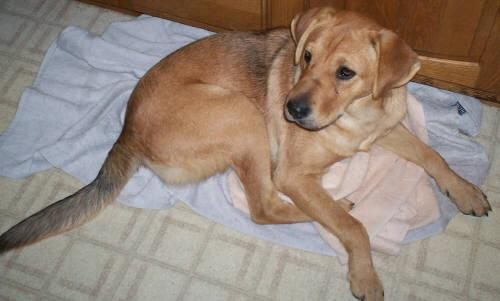

In [7]:
sample = dirpath + random.choice(filenames)
img = Image.open(sample)
display(img)

### Wykrycie ps√≥w na obrazach i przyciƒôcie ich

In [8]:
def make_square(image):
    height, width = image.shape[:2]

    max_side = max(height, width)
    top = bottom = left = right = 0

    if height < max_side:
        diff = max_side - height
        top = diff // 2
        bottom = diff - top
    elif width < max_side:
        diff = max_side - width
        left = diff // 2
        right = diff - left

    mean_color = cv2.mean(image)
    mean_color = tuple(map(int, mean_color))
    padded_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=mean_color)

    return padded_image

In [9]:
preprocessed_dirpath = 'kagglecatsanddogs_5340/PetImages/Dog-preprocessed/'

if not os.path.exists(preprocessed_dirpath):
    os.makedirs(preprocessed_dirpath)

In [11]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True, trust_repo=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/wojtero/.cache/torch/hub/master.zip


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40.2/40.2 kB 1.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 57.6/57.6 kB 4.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 157.6/157.6 kB 2.1 MB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 701.1/701.1 kB 7.0 MB/s eta 0:00:00a 0:00:01m
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11.6/11.6 MB 7.2 MB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚

YOLOv5 üöÄ 2024-1-20 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4080, 16057MiB)

100.0%

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


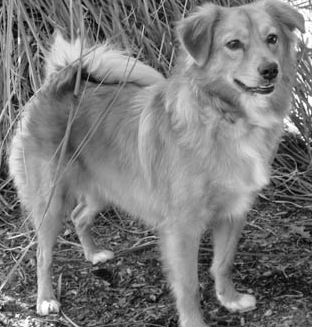

In [12]:
sample = 'kagglecatsanddogs_5340/PetImages/Dog/' + '10003.jpg'
image = cv2.imread(sample, cv2.IMREAD_COLOR)
results = model(image)

pd_results = results.pandas().xyxy[0]
pd_results = pd_results[pd_results['name'] == 'dog']
pd_results = pd_results[pd_results['confidence'] > 0.5]
top, bottom, left, right = pd_results[['ymax', 'ymin', 'xmin', 'xmax']].values[0]
left, right, top, bottom = round(left), round(right), round(top), round(bottom)

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cropped_image = image[bottom:top, left:right]

img = Image.fromarray(cropped_image)
display(img)

In [13]:
def process_image(filename, dirpath, preprocessed_dirpath):
    try:
        image = cv2.imread(dirpath + filename, cv2.IMREAD_COLOR)
        width, height = image.shape[:2]
        
        results = model(image) 
        
        pd_results = results.pandas().xyxy[0]
        pd_results = pd_results[pd_results['name'] == 'dog']
        pd_results = pd_results[pd_results['confidence'] > 0.5]
        if len(pd_results) == 0:
            return None
        top, bottom, left, right = pd_results[['ymax', 'ymin', 'xmin', 'xmax']].values[0]
        left, right, top, bottom = round(left), round(right), round(top), round(bottom)
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        cropped_image = image[bottom:top, left:right]
        
        padded_image = make_square(cropped_image)
        padded_resized_image = cv2.resize(padded_image, IMAGE_SIZE)
        
        cv2.imwrite(preprocessed_dirpath + filename, padded_resized_image)
        
        return width, height
    except Exception as e:
        raise Exception(f"Error processing {filename}: {e}")


In [14]:
mean_size = np.zeros(2)
cnt = 0

start_time = time.time()
for filename in filenames:
    try:
        shape = process_image(filename, dirpath, preprocessed_dirpath)
        if shape:
            mean_size += np.array(shape[:2])
            cnt += 1
    except Exception as e:
        print(f"An error occurred: {e}")

end_time = time.time()
print(f"Total time: {end_time - start_time}")
print(f"Mean size: {mean_size / cnt}.\nTotal count: {cnt}")

### -------------------
# Total time: 1510.6200618743896
# Mean size: [        381       420.6].
# Total count: 6487

An error occurred: Error processing 7112.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 6059.jpg: 'NoneType' object has no attribute 'shape'


Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


An error occurred: Error processing 7459.jpg: 'NoneType' object has no attribute 'shape'


Corrupt JPEG data: 254 extraneous bytes before marker 0xd9


An error occurred: Error processing 10401.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 10158.jpg: 'NoneType' object has no attribute 'shape'


Corrupt JPEG data: 226 extraneous bytes before marker 0xd9


An error occurred: Error processing 1866.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 10797.jpg: 'NoneType' object has no attribute 'shape'


Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


An error occurred: Error processing 3136.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 4367.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 10747.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 11849.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 6718.jpg: 'NoneType' object has no attribute 'shape'


Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


An error occurred: Error processing 5736.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 7133.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 9188.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 5604.jpg: 'NoneType' object has no attribute 'shape'


Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


An error occurred: Error processing 3288.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 6238.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 8730.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 3588.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 11702.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 7969.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 1308.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 7369.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 2688.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 2384.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 11853.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: 

Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9


An error occurred: Error processing 11675.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 2877.jpg: 'NoneType' object has no attribute 'shape'
Total time: 72.31985402107239
Mean size: [     380.97      420.61].
Total count: 6489


# VAE

In [3]:
preprocessed_dirpath = 'kagglecatsanddogs_5340/PetImages/Dog-preprocessed/'
filenames = [filename for filename in os.listdir(preprocessed_dirpath)]
print(f"Total number of images: {len(filenames)}")

Total number of images: 6487


In [4]:
X = np.zeros((len(filenames), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.uint8)
for filename in filenames:
    image = cv2.imread(preprocessed_dirpath + filename, cv2.IMREAD_GRAYSCALE)
    X[filenames.index(filename)] = image.reshape(IMAGE_HEIGHT, IMAGE_WIDTH, 1) / 255.
    
X_orig = X.copy()

print(X.shape)

(6487, 64, 64, 1)


In [5]:
ratio = 0.8

X = X_orig.copy()

split_index = round(X.shape[0] * ratio)
X_train_val = X[:split_index]
X_test = X[split_index:]

split_index_train_val = round(X_train_val.shape[0] * ratio)
X_train = X_train_val[:split_index_train_val]
X_val = X_train_val[split_index_train_val:]

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (4152, 64, 64, 1)
Validation set shape: (1038, 64, 64, 1)
Test set shape: (1297, 64, 64, 1)


In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.metrics import *

In [8]:
# Please notice - padding="same", so padding is used and no change in spatial resolution is observed
def conv2D_block(input, num_filters, act="gelu", padd="same", k_init="he_normal"):
    conv = Conv2D(num_filters, (3, 3), activation=act, padding=padd, kernel_initializer=k_init)(input)
    conv = Conv2D(num_filters, (3, 3), activation=act, padding=padd, kernel_initializer=k_init)(conv)
    return conv

In [9]:
# Single encoder block
def encoder_block(input, num_filters):
    conv = conv2D_block(input, num_filters)
    pool = MaxPooling2D((2, 2))(conv)
    return conv, pool

In [10]:
# Single decoder block
def decoder_block(input, skip_conn, num_filters):
    uconv = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    con = concatenate([uconv, skip_conn])
    out = conv2D_block(con, num_filters)
    return out

In [11]:
# Build the model: use encoder block and decoder block
def build_model(input_shape, num_channels=1):
    input_layer = Input(input_shape)

    # Encoder
    c1, p1 = encoder_block(input_layer, 32)
    c2, p2 = encoder_block(p1, 64)  # Additional encoder block

    # Bottleneck
    b1 = conv2D_block(p2, 128)  # output -> (16, 16, 128)

    # Decoder
    d1 = decoder_block(b1, c2, 64)
    d2 = decoder_block(d1, c1, 32)  # Additional decoder block

    # Output
    output_layer = Conv2D(num_channels, (1, 1), padding="same", activation="sigmoid")(d2)

    model = Model(inputs=input_layer, outputs=output_layer, name="ImageAutoencoder")
    return model

In [17]:
# source: https://colab.research.google.com/drive/12kzkT9E-iPCv2zsgTcag8y2Cm9FNDn0_#scrollTo=78wlGjisb2Cg
# BUT extended
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model = build_model(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 1))
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[RootMeanSquaredError()])

In [18]:
model.summary()

Model: "ImageAutoencoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 64, 64, 32)           320       ['input_2[0][0]']             
                                                                                                  
 conv2d_12 (Conv2D)          (None, 64, 64, 32)           9248      ['conv2d_11[0][0]']           
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 32)           0         ['conv2d_12[0][0]']           
 g2D)                                                                              

In [19]:
history = model.fit(X_train, X_train, epochs = 300, validation_data = (X_val, X_val))

Epoch 1/300
130/130 [==============================] - 2s 8ms/step - loss: 16124.4082 - root_mean_squared_error: 126.9819 - val_loss: 16267.4531 - val_root_mean_squared_error: 127.5439
Epoch 2/300
130/130 [==============================] - 1s 7ms/step - loss: 16124.4033 - root_mean_squared_error: 126.9819 - val_loss: 16267.4531 - val_root_mean_squared_error: 127.5439
Epoch 3/300
130/130 [==============================] - 1s 7ms/step - loss: 16124.4043 - root_mean_squared_error: 126.9819 - val_loss: 16267.4531 - val_root_mean_squared_error: 127.5439
Epoch 4/300
130/130 [==============================] - 1s 7ms/step - loss: 16124.4043 - root_mean_squared_error: 126.9819 - val_loss: 16267.4531 - val_root_mean_squared_error: 127.5439
Epoch 5/300
130/130 [==============================] - 1s 7ms/step - loss: 16124.4043 - root_mean_squared_error: 126.9819 - val_loss: 16267.4531 - val_root_mean_squared_error: 127.5439
Epoch 6/300
130/130 [==============================] - 1s 7ms/step - loss: 

In [15]:
import matplotlib.pyplot as plt

def compare_images(image, generated_image):

    fig, ax = plt.subplots(1,2, figsize=(12,6))

    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Image')
    ax[1].imshow(generated_image, cmap='gray')
    ax[1].set_title('Generated image')

    plt.show()

(1298, 64, 64, 1)
1/1 [==============================] - 0s 9ms/step


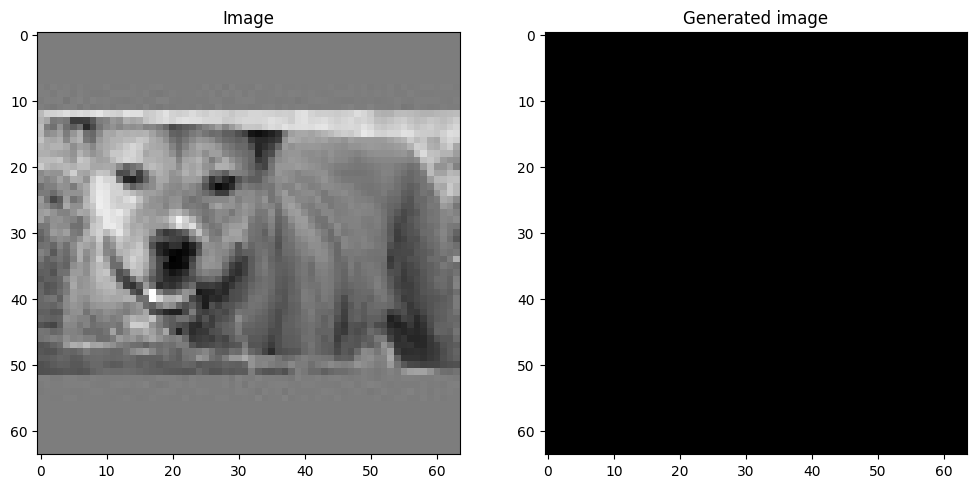

1/1 [==============================] - 0s 9ms/step


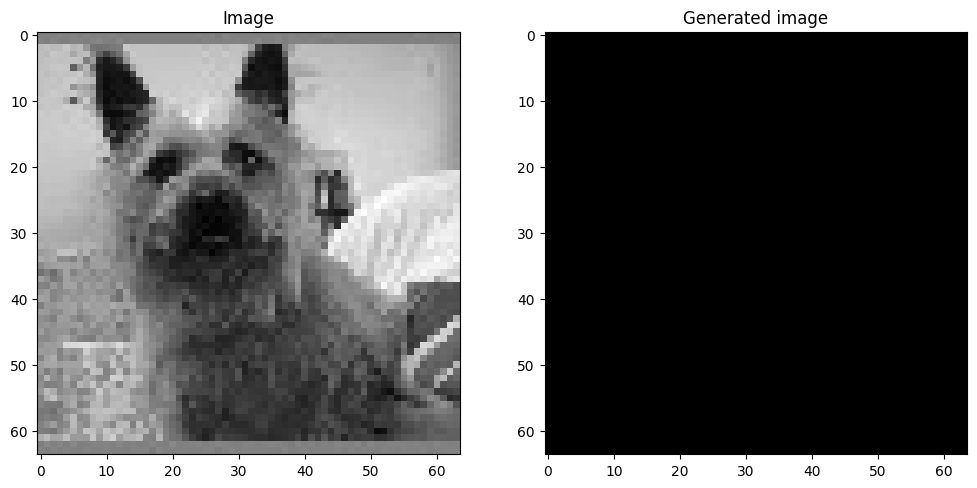

In [21]:
sample_size = 2
print(X_test.shape)
sample = np.random.randint(0, X_test.shape[0], sample_size)
for i in range(sample_size):
    compare_images(X_test[sample[i]], model.predict(np.expand_dims(X_test[sample[i]], 0))[0])

In [ ]:
# TODO:
# - FIX
# - make VAE model
# - save model
# - plot history
# - test model

# VAE 2

In [119]:
X_train_vae = X_train / 255.
X_valid_vae = X_val / 255.

In [75]:
import tensorflow.keras as keras
K = keras.backend

In [130]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [149]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [132]:
codings_size = 1024

inputs = keras.layers.Input(shape=[64, 64])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

In [133]:
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(64 * 64, activation="sigmoid")(x)
outputs = keras.layers.Reshape([64, 64])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

In [134]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

In [135]:
latent_loss = -0.5 * K.sum(1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean), axis=-1)
variational_ae.add_loss(K.mean(latent_loss))
variational_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=[rounded_accuracy])

In [136]:
history = variational_ae.fit(X_train_vae, X_train_vae, epochs=100, batch_size=128, validation_data=(X_valid_vae, X_valid_vae))

Epoch 1/100
33/33 [==============================] - 1s 6ms/step - loss: 64.8798 - rounded_accuracy: 0.5665 - val_loss: 9.2729 - val_rounded_accuracy: 0.6128
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 5.1234 - rounded_accuracy: 0.6165 - val_loss: 3.3347 - val_rounded_accuracy: 0.6059
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 2.5794 - rounded_accuracy: 0.5981 - val_loss: 2.2933 - val_rounded_accuracy: 0.5892
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 2.0123 - rounded_accuracy: 0.5946 - val_loss: 1.9210 - val_rounded_accuracy: 0.5858
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 1.7303 - rounded_accuracy: 0.5974 - val_loss: 1.6969 - val_rounded_accuracy: 0.5929
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 1.5478 - rounded_accuracy: 0.5976 - val_loss: 1.5587 - val_rounded_accuracy: 0.5898
Epoch 7/100
33/33 [==============================] - 0s 3

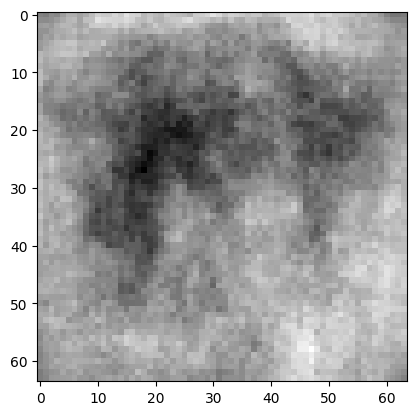

In [138]:
codings = tf.random.normal(shape=[1, codings_size])
images = variational_decoder(codings).numpy()
plt.imshow(images[0], cmap='gray')

In [139]:
def compare_images(image, generated_image):
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Image')
    ax[1].imshow(generated_image, cmap='gray')
    ax[1].set_title('Generated image')
    plt.show()

In [140]:
X_test_vae = X_test / 255.

(1298, 64, 64, 1)
1/1 [==============================] - 0s 73ms/step


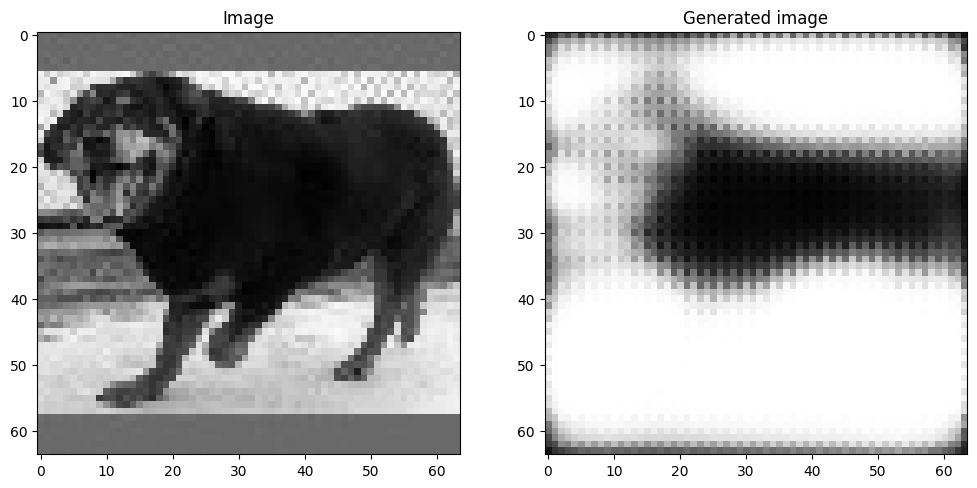

1/1 [==============================] - 0s 10ms/step


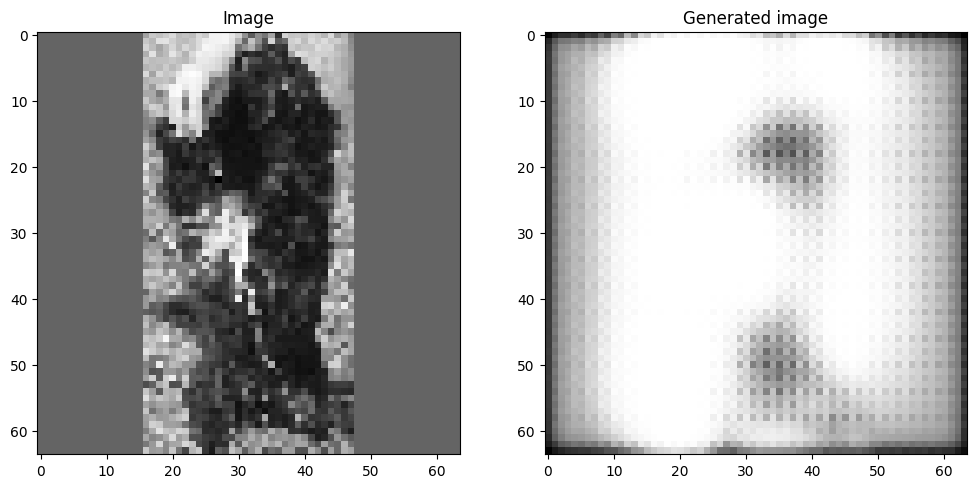

In [141]:
sample_size = 2
print(X_test.shape)
sample = np.random.randint(0, X_test.shape[0], sample_size)
for i in range(sample_size):
    compare_images(X_test_vae[sample[i]], model.predict(np.expand_dims(X_test_vae[sample[i]], 0))[0])

# VAE 3

In [8]:
import tensorflow.keras as keras
K = keras.backend

In [9]:
X_train_vae = X_train / 255.
X_valid_vae = X_val / 255.
X_test_vae = X_test / 255.

In [10]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [48]:
class VariationalDeepAutoencoder(tf.keras.models.Model):
  def __init__(self, data_shape, latent_dimension, encoder_activation, decoder_activation, padding='same'):
    super(VariationalDeepAutoencoder, self).__init__()
    self.latent_dimension = latent_dimension
    self.rows_columns = int(np.sqrt(latent_dimension))
    self.model_name = "Variational Deep Autoencoder"

    input = tf.keras.layers.Input(shape=data_shape)
    layer = tf.keras.layers.Conv2D(32, 3, activation=encoder_activation, padding=padding)(input)
    layer = tf.keras.layers.MaxPool2D(2)(layer)
    layer = tf.keras.layers.Conv2D(64, 3, activation=encoder_activation, padding=padding)(layer)
    layer = tf.keras.layers.MaxPool2D(2)(layer)
    layer = tf.keras.layers.Conv2D(128, 3, activation=encoder_activation, padding=padding)(layer)
    layer = tf.keras.layers.LayerNormalization()(layer)
    layer = tf.keras.layers.Flatten()(layer)
    self.encoding_mean = keras.layers.Dense(self.latent_dimension)(layer)
    self.encoding_log_var = keras.layers.Dense(self.latent_dimension)(layer)
    self.encoding = Sampling()([self.encoding_mean, self.encoding_log_var])

    self.encoder = keras.models.Model(inputs=[input], outputs=[self.encoding_mean, self.encoding_log_var, self.encoding])
    # _, _, self.encoding = self.encoder(input)

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(self.latent_dimension, activation=decoder_activation),
      tf.keras.layers.Reshape((self.rows_columns, self.rows_columns, data_shape[2])),
      tf.keras.layers.UpSampling2D((2, 2), interpolation="nearest"),
      tf.keras.layers.Conv2D(64, 3, activation=decoder_activation, padding=padding),
      #tf.keras.layers.UpSampling2D((2,2), interpolation="nearest"),
      #tf.keras.layers.Conv2D(32, 3, activation=decoder_activation, padding=padding),
      tf.keras.layers.Conv2D(1, 1),
      tf.keras.layers.Activation("sigmoid")
    ])

  def call(self, x):
    _, _, encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [49]:
latent_dimension = 1024
encoder_activation = 'relu'
decoder_activation = 'sigmoid'
epochs = 20

model = VariationalDeepAutoencoder(X_train_vae.shape[1:], latent_dimension, encoder_activation, decoder_activation)
latent_loss = -0.5 * K.sum(1 + model.encoding_log_var - K.exp(model.encoding_log_var) - K.square(model.encoding_mean), axis=-1)
model.add_loss(latent_loss)
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001))

model.fit(X_train_vae, X_train_vae, epochs=epochs, shuffle=True, validation_data=(X_valid_vae, X_valid_vae))

Epoch 1/20


ValueError: in user code:

    File "/home/wojtero/PycharmProjects/vae-ug-homework/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/wojtero/PycharmProjects/vae-ug-homework/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/wojtero/PycharmProjects/vae-ug-homework/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/wojtero/PycharmProjects/vae-ug-homework/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/wojtero/PycharmProjects/vae-ug-homework/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/home/wojtero/PycharmProjects/vae-ug-homework/venv/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 328, in __call__
        total_total_loss_mean_value = tf.add_n(total_loss_mean_values)
    File "/home/wojtero/PycharmProjects/vae-ug-homework/venv/lib/python3.10/site-packages/keras/src/layers/core/tf_op_layer.py", line 119, in handle
        return TFOpLambda(op)(*args, **kwargs)
    File "/home/wojtero/PycharmProjects/vae-ug-homework/venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "tf.math.add_n_9" (type TFOpLambda).
    
    Shapes must be equal rank, but are 0 and 1
    	From merging shape 0 with other shapes. for '{{node tf.math.add_n_9/AddN}} = AddN[N=2, T=DT_FLOAT](tf.math.add_n_9/AddN/binary_crossentropy/weighted_loss/value, Placeholder)' with input shapes: [], [?].
    
    Call arguments received by layer "tf.math.add_n_9" (type TFOpLambda):
      ‚Ä¢ inputs=['tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(None,), dtype=float32)']
      ‚Ä¢ name=None


# VAE 4

In [17]:
import matplotlib.pyplot as plt

In [18]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(64, 64, 1)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=16*16*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(16, 16, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits


In [19]:
optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x, beta = 1.0):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + beta * (logpz - logqz_x))


@tf.function
def train_step(model, x, optimizer, beta = 1.0):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x, beta)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))


In [20]:
epochs = 40
annealing_cycles = 4
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 1024
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

In [21]:
train_size = X_train.shape[0]
val_size = X_val.shape[0]
test_size = X_test.shape[0]

batch_size = 128

train_dataset = (tf.data.Dataset.from_tensor_slices(X_train.astype(np.float32)).shuffle(train_size).batch(batch_size))
val_dataset = (tf.data.Dataset.from_tensor_slices(X_val.astype(np.float32)).shuffle(val_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(X_test.astype(np.float32)).shuffle(test_size).batch(batch_size))

In [22]:
annealing_cycle_length = epochs // annealing_cycles

for epoch in range(1, epochs + 1):
  start_time = time.time()
  beta = float(int(epoch) % int(annealing_cycle_length)) / annealing_cycle_length
  for train_x in train_dataset:
    train_step(model, train_x, optimizer, beta)
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for val_x in test_dataset:
    loss(compute_loss(model, val_x, beta))
  elbo = -loss.result()
  print('Epoch: {}, Validation set ELBO: {}, beta: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, beta, end_time - start_time))

Epoch: 1, Validation set ELBO: -2573.57275390625, beta: 0.1, time elapse for current epoch: 1.7314250469207764
Epoch: 2, Validation set ELBO: -346.58709716796875, beta: 0.2, time elapse for current epoch: 1.4059021472930908
Epoch: 3, Validation set ELBO: -195.6868133544922, beta: 0.3, time elapse for current epoch: 1.4597282409667969
Epoch: 4, Validation set ELBO: -155.06906127929688, beta: 0.4, time elapse for current epoch: 1.3193209171295166
Epoch: 5, Validation set ELBO: -130.7180633544922, beta: 0.5, time elapse for current epoch: 1.3362126350402832
Epoch: 6, Validation set ELBO: -117.66377258300781, beta: 0.6, time elapse for current epoch: 1.3365392684936523
Epoch: 7, Validation set ELBO: -95.62319946289062, beta: 0.7, time elapse for current epoch: 1.333463430404663
Epoch: 8, Validation set ELBO: -88.797119140625, beta: 0.8, time elapse for current epoch: 1.3331542015075684
Epoch: 9, Validation set ELBO: -90.5186767578125, beta: 0.9, time elapse for current epoch: 1.33178019523

1/1 [==============================] - 0s 78ms/step


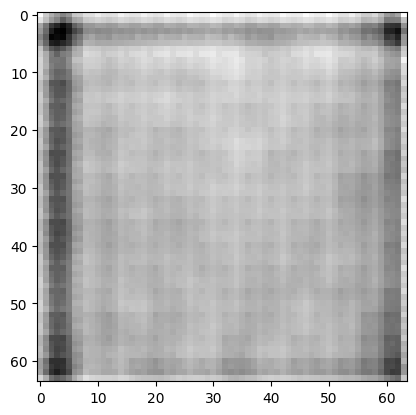

In [23]:
encoded, _ = model.encode(X_test[12].reshape((1, 64, 64, 1)))
decoded = model.decoder.predict(encoded)
plt.imshow(decoded.reshape((64, 64, 1)), cmap='gray')

1/1 [==============================] - 0s 16ms/step


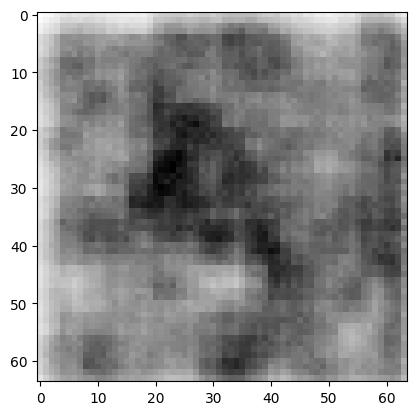

In [24]:
random = tf.random.uniform((1, 1024))
image = model.decoder.predict(random)
plt.imshow(image.reshape(64, 64, 1), cmap='gray')